# Clase 4 - Ejercicios de mitad de curso
<br/>

## Curso de Especialización en Inteligencia Artificial
## Analisis profundo
<br/>

### Autor: Maximiliano Torti
### Fecha: 23/07/21
<br/>


# 3. Deep Learning y Regularización

a. Crear un dataset sintético con 10,000 muestras a partir de la siguiente
expresión, donde N es una normal de media cero y desvío 0.2. Utilizar 80%
de los datos para entrenamiento y 20% de los datos para testing.

$$
𝑦 = (𝑥 − 2)^2 + 3 + 𝑁
$$

b. Suponer que se tiene un modelo, tal que la relación entre la salida y la
entrada está dada por la ecuación presentada a continuación. Suponiendo
que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los
pesos w1, w2 y w3 tal que minimizan el ECM (Error Cuadrático Medio) (el
ECM es la función de costo para este problema), ¿cuál sería la regla de
actualización de cada parámetro?. Implementar el algoritmo en Python (usar
mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar ECM
sobre dataset de entrenamiento y dataset de testing.

$$
𝑦 = 𝑤_1 𝑥_2 + 𝑤_2 𝑥 + 𝑤_3
$$

c. Ahora se le agrega regularización l2 a la función de costo, ¿cómo cambia la
regla de actualización de cada parámetro?. Implementar el algoritmo en
Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y
reportar ECM sobre dataset de entrenamiento y dataset de testing.
Seleccionar manualmente los parámetros para el learning rate y para el
coeficiente de regularización.

d. En lugar de seleccionar manualmente el learning rate y el coeficiente de
regularización, utiliza el 10% del dataset de entrenamiento como dataset de
validación. Hacer una búsqueda (grid search) de los hiper parámetros que
mejor resultado te dan para el ECM sobre el dataset de validación. Luego,
utiliza los mejores hiper parámetros para reportar las métricas sobre el
dataset de testing.

e. En los puntos (b), (c) y (d) utilizaste Python para hacer la implementación y el
modelo ya estaba establecido. En este punto se pide hacer una
implementación con Deep Learning en PyTorch. Las redes neuronales, si
tienen la suficiente cantidad de layers y se están utilizando las funciones de
activación adecuadas, son capaces de representar cualquier función para
mapear la entrada a la salida. Proponer una arquitectura, agregar
regularización mediante la técnica dropout, entrenar la red neuronal, buscar
los mejores hiper parámetros y presentar el ECM sobre el dataset de testing.
Comparar los resultados obtenidos en (e) con los puntos anteriores.

f. Para el punto (e), ¿qué función de activación seleccionaste y por qué? Para
la función que hayas seleccionado, explica sus características, su forward y
su backward.

In [1]:
import numpy as np
from sklearn import model_selection

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 20

--------------------------------------------------------------------------------------------------------------------------------
## Punto a

In [2]:
class Dataset:
    
    x_train = None
    Y_train = None
    x_test = None
    Y_test = None
    
    def __init__(self, n_samples=10000, min_x=-2, max_x=5, std=0.2):
        
        x = np.random.uniform(min_x,max_x,size=n_samples)
        Y = np.power(x-2,2) + 3 + np.random.normal(0, std, n_samples)

        self.x_train, self.x_test, self.Y_train, self.Y_test = \
            model_selection.train_test_split( x, Y, test_size=0.2, random_state=5)
        
        pass

In [3]:
data = Dataset()

Text(0, 0.5, 'y')

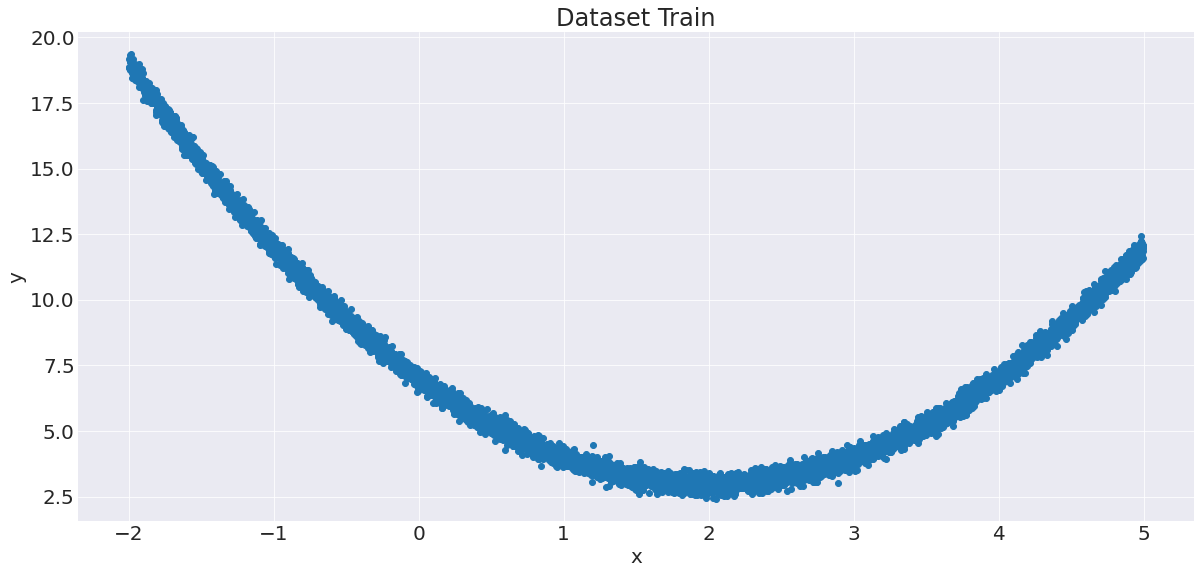

In [4]:
# Plot nube de puntos del dataset
plt.figure()
plt.scatter(data.x_train,data.Y_train)
plt.title('Dataset Train')
plt.xlabel('x')
plt.ylabel('y')

--------------------------------------------------------------------------------------------------------------------------------
## Punto b

Si la función de costo es el ECM, y utilizamos mini-batch SGD (con m tamaño del batch), entonces por cada batch:

$$
J = ECM = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y_i})^2
$$
<br>
$$
\nabla J = [ \frac{dJ}{dw_1} , \frac{dJ}{dw_2} , \frac{dJ}{dw_3}]
$$
<br>
$$
\frac{dJ}{dw_1} = \frac{-2}{m} \sum_{i=1}^{m} (y_i - \hat{y_i}) * x_i^2
$$
<br>
$$
\frac{dJ}{dw_2} = \frac{-2}{m} \sum_{i=1}^{m} (y_i - \hat{y_i}) * x_i
$$
<br>
$$
\frac{dJ}{dw_3} = \frac{-2}{m} \sum_{i=1}^{m} (y_i - \hat{y_i}) * 1
$$
<br>
Luego, para actualizar los parámetros w:
<br>
$$
w_1 = w_1 - \lambda * \frac{dJ}{dw_1} \\
w_2 = w_2 - \lambda * \frac{dJ}{dw_2} \\
w_3 = w_3 - \lambda * \frac{dJ}{dw_3} \\
$$

In [5]:
class MSE():
    """
    Metrica MSE / ECM
    """
    def __init__(self):
        pass

    def __call__(self,truth, predicted):
        """
        Calculo de MSE
        
        Args:
            truth (numpy array): array de valores verdaderos
            predicted (numpy array): array de valores predichos

        Returns
            float: error cuadrático medio

        """
        mse= np.sum(np.power((predicted - truth),2))/ predicted.shape[0]
        return mse

In [6]:
class BatchGradientDescentModel():
    """
    Modelo de aproximación con regresión afín a la lineal polinómica
    """
    model = None
    deg = None
    bias = None
    
    def __init__(self):
        pass
    
    def fit(self, X, y, lr=0.01, epochs=100, b=50):
        
        X=X[:,np.newaxis]
        X=np.append(X**2, X, axis = 1)
        X=np.append(X, np.ones(shape=(X.shape[0],1)), axis = 1)
            
    
        m = X.shape[1]

        # initialize random weights
        W = np.zeros(shape=(m, 1),dtype='float64')
        
        train_errors=[]
        mse = MSE()

        # iterate over the n_epochs
        for i in range(epochs):

            # Shuffle all the samples 
            idx = np.random.permutation(X.shape[0])
            X = X[idx]
            y = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X) / b)

            # Iterate over the batches
            for i in range(0, len(X), batch_size):

                end = i + batch_size if i + batch_size <= len(X) else len(X)
                batch_X = X[i: end] # batch_size*m
                batch_y = y[i: end] # batch_size*1

                # Calculate the prediction for the whole batch
                prediction = batch_X@W  # batch_sizex1
                # Calculate the error for the whole batch
                error = batch_y - prediction[:,0]  # batch_sizex1

                # Calculate the gradient for the batch

                # error[batch_sizex1]*batch_X[batch_size*m]--> broadcasting --> batch_size*m
                grad_sum = np.sum(error[:,np.newaxis]* batch_X, axis=0) # 1xm
                grad_mul = -2/batch_size * grad_sum  # 1xm
                gradient = grad_mul[:,np.newaxis]  # mx1

                # Update the weights
                W = W - (lr * gradient)
            
            y_predictions = X@W 
            train_errors.append(mse(y,y_predictions[:,0]))

        self.model=W
        return train_errors
    
    
    def predict(self,X):

        X=X[:,np.newaxis]
        X=np.append(X**2, X, axis = 1)
        X=np.append(X, np.ones(shape=(X.shape[0],1)), axis = 1)
            
        y=X@self.model
        return y[:,0]
    
    
    def test(self,X,y):
        
        X=X[:,np.newaxis]
        X=np.append(X**2, X, axis = 1)
        X=np.append(X, np.ones(shape=(X.shape[0],1)), axis = 1)
            
        y_predictions=X@self.model
        
        mse = MSE()
        error= mse(y,y_predictions[:,0])
        
        return y_predictions[:,0], error

In [7]:
model_3b = BatchGradientDescentModel()
train_errors = model_3b.fit(data.x_train,data.Y_train)

ECM on train dataset: 0.04042915702606051


Text(0, 0.5, 'ECM')

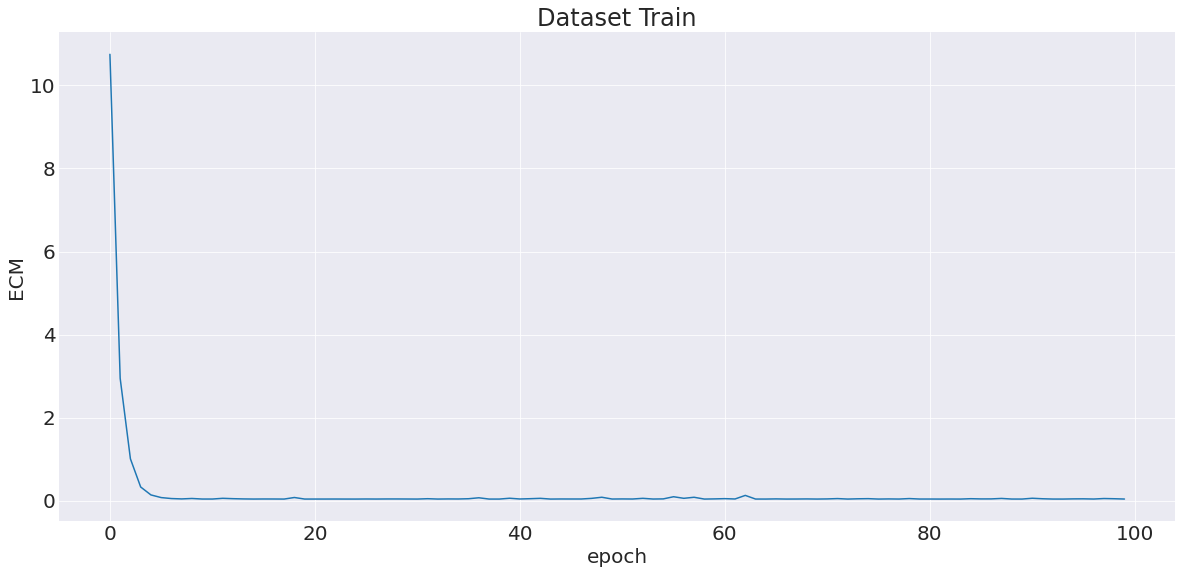

In [8]:
print("ECM on train dataset: {}".format(train_errors[-1]))
plt.figure()
plt.plot(train_errors)
plt.title('Dataset Train')
plt.xlabel('epoch')
plt.ylabel('ECM')

In [9]:
y_predictions, test_error = model_3b.test(data.x_test,data.Y_test)
print("ECM on test dataset: {}".format(test_error))

ECM on test dataset: 0.03993788663220245


Text(0, 0.5, 'y')

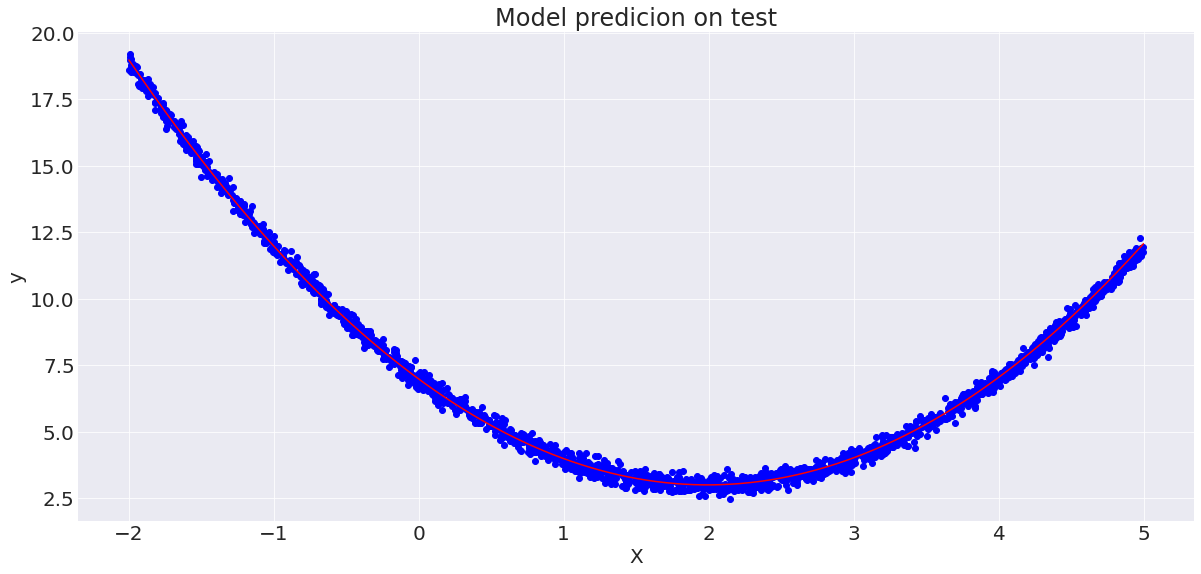

In [10]:
# Plot nube de puntos del dataset
idx_sort = np.argsort(data.x_test)
plt.figure()
plt.plot(data.x_test[idx_sort],y_predictions[idx_sort],color='red')
plt.scatter(data.x_test,data.Y_test,color='blue')
plt.title('Model predicion on test')
plt.xlabel('X')
plt.ylabel('y')

--------------------------------------------------------------------------------------------------------------------------------
## Punto c

Si la función de costo es el ECM con regularización L2 (con alfa coeficiente de regularizacion), y utilizamos mini-batch SGD (con m tamaño del batch), entonces por cada batch:

$$
J = ECM + \alpha * w^2 = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y_i})^2 + \frac{\alpha}{2} * w^T * w
$$
<br>
$$
\nabla J = [ \frac{dJ}{dw_1} , \frac{dJ}{dw_2} , \frac{dJ}{dw_3}]
$$
<br>
$$
\frac{dJ}{dw_1} = \frac{-2}{m} \sum_{i=1}^{m} (y_i - \hat{y_i}) * x_i^2 + \alpha * w_1
$$
<br>
$$
\frac{dJ}{dw_2} = \frac{-2}{m} \sum_{i=1}^{m} (y_i - \hat{y_i}) * x_i + \alpha * w_2
$$
<br>
$$
\frac{dJ}{dw_3} = \frac{-2}{m} \sum_{i=1}^{m} (y_i - \hat{y_i}) * 1 + \alpha * w_3
$$
<br>
Luego, para actualizar los parámetros w:
<br>
$$
w_1 = w_1 - \lambda * \frac{dJ}{dw_1} \\
w_2 = w_2 - \lambda * \frac{dJ}{dw_2} \\
w_3 = w_3 - \lambda * \frac{dJ}{dw_3} \\
$$

In [11]:
class L2BatchGradientDescentModel():
    """
    Modelo de aproximación con regresión afín a la lineal polinómica
    """
    model = None
    deg = None
    bias = None
    
    def __init__(self):
        pass
    
    def fit(self, X, y, lr=0.01, epochs=100, b=50, alpha=0.001):
        
        X=X[:,np.newaxis]
        X=np.append(X**2, X, axis = 1)
        X=np.append(X, np.ones(shape=(X.shape[0],1)), axis = 1)
    
        m = X.shape[1]

        # initialize random weights
        W = np.zeros(shape=(m, 1),dtype='float64')
        
        train_errors=[]
        mse = MSE()

        # iterate over the n_epochs
        for i in range(epochs):

            # Shuffle all the samples 
            idx = np.random.permutation(X.shape[0])
            X = X[idx]
            y = y[idx]

            # Calculate the batch size in samples as a function of the number of batches
            batch_size = int(len(X) / b)

            # Iterate over the batches
            for i in range(0, len(X), batch_size):

                end = i + batch_size if i + batch_size <= len(X) else len(X)
                batch_X = X[i: end] # batch_size*m
                batch_y = y[i: end] # batch_size*1

                # Calculate the prediction for the whole batch
                prediction = batch_X@W  # batch_sizex1
                # Calculate the error for the whole batch
                error = batch_y - prediction[:,0]  # batch_sizex1

                # Calculate the gradient for the batch

                # error[batch_sizex1]*batch_X[batch_size*m]--> broadcasting --> batch_size*m
                grad_sum = np.sum(error[:,np.newaxis]* batch_X, axis=0) # 1xm
                grad_mul = -2/batch_size * grad_sum  # 1xm
                gradient = grad_mul[:,np.newaxis]  + (alpha *  W)  # mx1

                # Update the weights
                W = W - (lr * gradient)
            
            y_predictions = X@W 
            train_errors.append(mse(y,y_predictions[:,0]))

        self.model=W
        return train_errors
    
    
    def predict(self,X):

        X=X[:,np.newaxis]
        X=np.append(X**2, X, axis = 1)
        X=np.append(X, np.ones(shape=(X.shape[0],1)), axis = 1)
            
        y=X@self.model
        return y[:,0]
    
    
    def test(self,X,y):
        
        X=X[:,np.newaxis]
        X=np.append(X**2, X, axis = 1)
        X=np.append(X, np.ones(shape=(X.shape[0],1)), axis = 1)
            
        y_predictions=X@self.model
        
        mse = MSE()
        error= mse(y,y_predictions[:,0])
        
        return y_predictions[:,0], error

In [12]:
model_3c = L2BatchGradientDescentModel()
train_errors = model_3c.fit(data.x_train,data.Y_train)

ECM on train dataset: 0.040039448573788106


Text(0, 0.5, 'ECM')

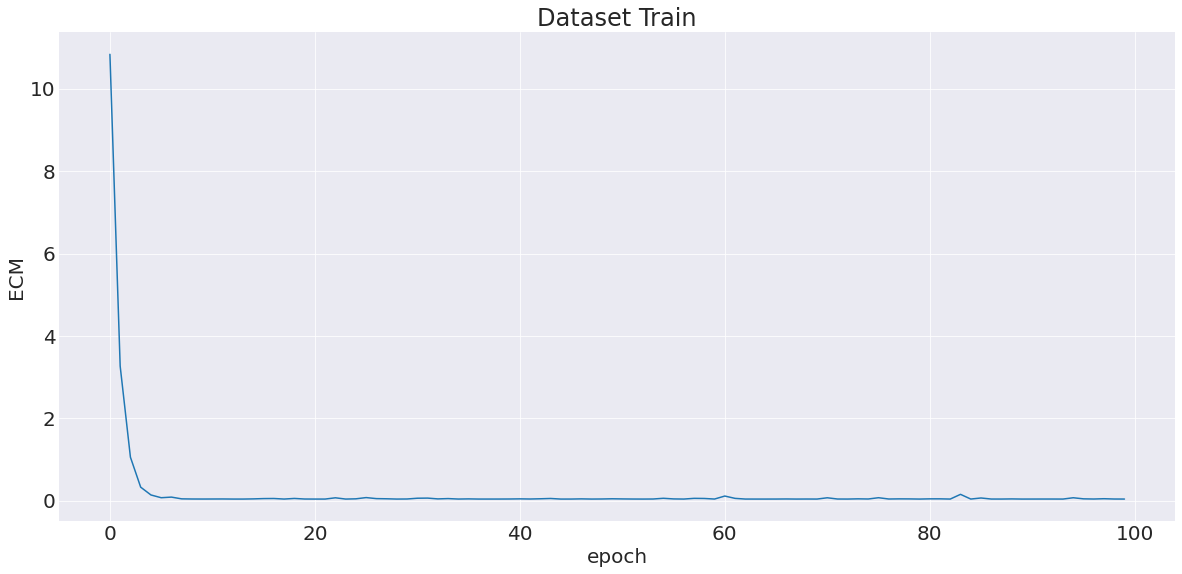

In [13]:
print("ECM on train dataset: {}".format(train_errors[-1]))
plt.figure()
plt.plot(train_errors)
plt.title('Dataset Train')
plt.xlabel('epoch')
plt.ylabel('ECM')

In [14]:
y_predictions, test_error = model_3c.test(data.x_test,data.Y_test)
print("ECM on test dataset: {}".format(test_error))

ECM on test dataset: 0.03938086008905984


Text(0, 0.5, 'y')

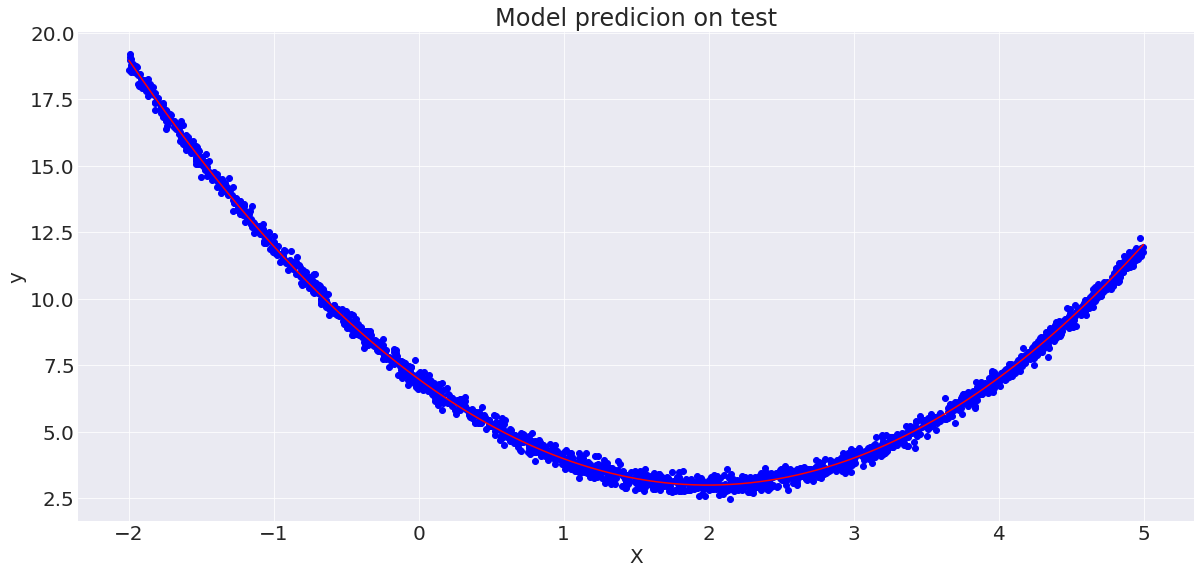

In [15]:
# Plot nube de puntos del dataset
idx_sort = np.argsort(data.x_test)
plt.figure()
plt.plot(data.x_test[idx_sort],y_predictions[idx_sort],color='red')
plt.scatter(data.x_test,data.Y_test,color='blue')
plt.title('Model predicion on test')
plt.xlabel('X')
plt.ylabel('y')

--------------------------------------------------------------------------------------------------------------------------------
## Punto d

In [16]:
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(data.x_train,data.Y_train, test_size=0.1, random_state=5)

grid_lr=[]
grid_alpha=[]
grid_valid_error=[]

for lr in [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1]:
    for alpha in [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1]:
        model_3d = L2BatchGradientDescentModel()
        model_3d.fit(x_train,y_train, lr=lr, alpha=alpha)
        y_dummy, valid_error =  model_3d.test(x_valid,y_valid)
        
        if ~np.isnan(valid_error):
            grid_lr.append(lr)
            grid_alpha.append(alpha)
            grid_valid_error.append(valid_error)

best_lr = grid_lr[np.argmin(grid_valid_error)]
best_alpha = grid_alpha[np.argmin(grid_valid_error)]
print("Best model: ")
print("Learning rate: {}".format(best_lr))
print("Reg. coef. : {}".format(best_alpha))
print("Validation error : {}".format(np.min(grid_valid_error)))

<ipython-input-5-8d07411319e8>:20: RuntimeWarning: overflow encountered in power
  mse= np.sum(np.power((predicted - truth),2))/ predicted.shape[0]
C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\MaxiT\.conda\envs\CEIAIIA\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-11-5b378044989c>:57: RuntimeWarning: invalid value encountered in subtract
  W = W - (lr * gradient)
<ipython-input-11-5b378044989c>:45: RuntimeWarning: invalid value encountered in matmul
  prediction = batch_X@W  # batch_sizex1
<ipython-input-11-5b378044989c>:52: RuntimeWarning: overflow encountered in multiply
  grad_sum = np.sum(error[:,np.newaxis]* batch_X, axis=0) # 1xm


Best model: 
Learning rate: 0.005
Reg. coef. : 0.0005
Validation error : 0.041250144137589755


In [17]:
model_3d = L2BatchGradientDescentModel()
train_errors = model_3d.fit(data.x_train,data.Y_train, lr=best_lr, alpha=best_alpha)
print("ECM on train dataset: {}".format(train_errors[-1]))
y_predictions, test_error = model_3d.test(data.x_test,data.Y_test)
print("ECM on test dataset: {}".format(test_error))

ECM on train dataset: 0.040969342565754546
ECM on test dataset: 0.039926220698915806


--------------------------------------------------------------------------------------------------------------------------------
## Punto e

In [18]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [19]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X=X=X[:,np.newaxis]
        self.Y=Y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx,:], self.Y[idx]

In [20]:
class NNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = torch.nn.Linear(in_features=1, out_features=10, bias = True)
        self.dropout_1= torch.nn.Dropout(p=0.05)
        self.activation_1 = torch.nn.LeakyReLU()
        self.linear_2 = torch.nn.Linear(in_features=10, out_features=20, bias = True)
        self.dropout_2= torch.nn.Dropout(p=0.05)
        self.activation_2 = torch.nn.LeakyReLU()
        self.linear_3 = torch.nn.Linear(in_features=20, out_features=1, bias = True)

    def forward(self, x):
        # X es el batch que va a entrar
        z1 = self.linear_1(x)
        d1 = self.dropout_1(z1)
        a1 = self.activation_1(d1)
        z2 = self.linear_2(a1)
        d2 = self.dropout_2(z2)
        a2 = self.activation_2(d2)
        y = self.linear_3(a2)
        return y

In [21]:
class MyPytorchNet:
    
    def __init__(self):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        pass
    
    def fit(self, X, y, lr=0.01, b=50, epochs=100):
        
        training_set = CustomDataset(X, y)
        training_dataloader = DataLoader(training_set,batch_size=b, shuffle=True)

        self.nnet = NNet()
        
        criterion = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(self.nnet.parameters(),lr=lr) # En realidad termina usando minibatch

        self.nnet.to(self.device)
        
        train_errors=[]

        for epoch in range(epochs):

            running_loss = 0

            for i, data in enumerate(training_dataloader):
                # data es una tupla batch (data, label)
                x, y = data #todavia esta en numpy
                x = x.to(self.device).float() #convierte a tensores y pasa a GPU si esta disponible
                y = y.to(self.device).float() #convierte a tensores y pasa a GPU si esta disponible

                # set gradient to zero
                optimizer.zero_grad()

                # forward
                y_hat = self.nnet(x)

                # loss
                loss = criterion(y_hat[:,0], y)

                # backward
                loss.backward()

                # update of parameters
                optimizer.step()

                # compute loss and statistics
                running_loss += loss.item()
            
            train_errors.append(running_loss/len(training_set))
            
        return train_errors
    
    def predict(self,X):

        test_set = CustomDataset(X)
        test_dataloader = DataLoader(test_set,batch_size=len(test_set), shuffle= False)
        
        for i, data in enumerate(test_dataloader):
            x = data 
            x = x.to(self.device).float() 
            y = self.nnet(x)

        return y[:,0]
    
    
    def test(self,X_test,y_test):
        
        test_set = CustomDataset(X_test,y_test)
        test_dataloader = DataLoader(test_set,batch_size=len(test_set), shuffle= False)

        for i, data in enumerate(test_dataloader):
            x, y_real= data 
            x = x.to(self.device).float()
            self.nnet.eval()
            y_predictions = self.nnet(x)

            mse = MSE()
            error= mse(y_real.detach().numpy(), y_predictions[:,0].detach().numpy())
        
        return y_predictions[:,0].detach().numpy(), error
        

In [22]:
grid_lr=[]
grid_valid_error=[]

for lr in [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1]:
    model_3e = MyPytorchNet()
    model_3e.fit(x_train,y_train, lr=lr)
    y_dummy, valid_error =  model_3e.test(x_valid,y_valid)
        
    if ~np.isnan(valid_error):
        grid_lr.append(lr)
        grid_valid_error.append(valid_error)
        
best_lr = grid_lr[np.argmin(grid_valid_error)]
print("Best model: ")
print("Learning rate: {}".format(best_lr))
print("Validation error : {}".format(np.min(grid_valid_error)))

Best model: 
Learning rate: 0.001
Validation error : 0.08131062507629394


In [23]:
model_3e = MyPytorchNet()
train_errors = model_3e.fit(data.x_train,data.Y_train, lr=best_lr)
print("ECM on train dataset: {}".format(train_errors[-1]))
y_predictions, test_error = model_3e.test(data.x_test,data.Y_test)
print("ECM on test dataset: {}".format(test_error))

ECM on train dataset: 0.010197723118588329
ECM on test dataset: 0.12827175903320312


Text(0, 0.5, 'y')

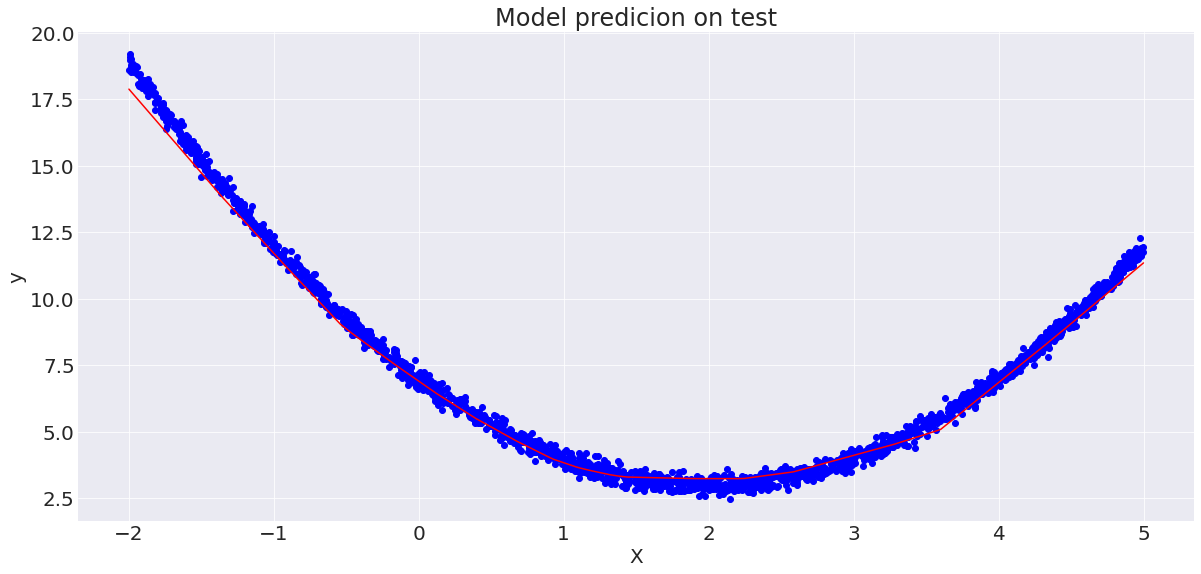

In [24]:
# Plot nube de puntos del dataset
idx_sort = np.argsort(data.x_test)
plt.figure()
plt.plot(data.x_test[idx_sort],y_predictions[idx_sort],color='red')
plt.scatter(data.x_test,data.Y_test,color='blue')
plt.title('Model predicion on test')
plt.xlabel('X')
plt.ylabel('y')

Se observa una peor performance del modelo respecto a los casos anteriores.

--------------------------------------------------------------------------------------------------------------------------------
## Punto f

Para la red seleccioné la activación LeakyReLU por ser simple, fácil y rápida de calcular (tanto el forward como el backward), y no tiene problemas de vanishing gradients.

En este caso el forward es:

$$
\mathcal{f(x)} =
  \begin{cases}
    x & \text{$x \geq 0 $} \\
    0.01 * x & \text{$x < 0 $}
  \end{cases}
$$

Y el backward:

$$
\mathcal{f'(x)} =
  \begin{cases}
    1 & \text{$x \geq 0 $} \\
    0.01 & \text{$x < 0 $}
  \end{cases}
$$


Para la salida no se utilizó función de activación ya que estamos ante un problema de regresión.